# Import

In [1]:
import qiskit as q
import pec_module as pec
import importlib
from qiskit_aer import AerSimulator
import numpy as np
from numpy.linalg import inv
import numpy as np
import csv

In [36]:
importlib.reload(pec)

<module 'pec_module' from '/home/xiaonan/PEC/pec_module.py'>

# Connect to IBMQ

In [ ]:
token = "PJubuPXreZKAxan0yV6OLEIkdKipFYGgvvkGQSZAtpMU"
instance = 'crn:v1:bluemix:public:quantum-computing:us-east:a/f071734952cb4c9993a642d0a87d18bb:392306ae-fe55-475c-a8c5-978d0ba1871e::'
device_name = "kingston"
device = "ibm_" + device_name
device, noise_model, service = pec.load_ibm_backend(token, instance, device)

In [10]:
# Get basis gates from noise model
basis_gates = noise_model.basis_gates
# Get coupling map from backend
coupling_map = device.configuration().coupling_map
print(len(coupling_map))

backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
# backend = AerSimulator(method = "statevector")
# backend = AerSimulator(method = "density_matrix")
print(noise_model)

352
NoiseModel:
  Basis gates: ['cz', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'sx', 'x', 'reset', 'cz', 'id']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
  Specific qubit errors: [('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8

# Prepare initial state and Circuit

In [16]:
qubit_numbers = 2
device_qubits = 34
initial_circuits = pec.build_initial_states(qubit_numbers)
measurements = pec.build_measurement_pauli(qubit_numbers, device_qubits)

# Execute and Result

In [17]:
job = pec.run_measurements(initial_circuits, measurements, backend, shots = 10000)
print(job)

In [18]:
g_matrix = pec.collect_results(job, qubit_numbers)
print(g_matrix)

[[ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00
   1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00
   1.000e+00  1.000e+00  1.000e+00  1.000e+00]
 [-4.400e-03  3.200e-03  9.832e-01 -4.000e-04  1.200e-03  3.200e-03
   9.864e-01  8.200e-03 -2.400e-03  2.200e-02  9.824e-01  2.200e-03
   1.000e-03  1.020e-02  9.828e-01 -5.800e-03]
 [ 8.000e-03  3.400e-03  9.400e-03  9.880e-01 -1.700e-02  2.460e-02
  -4.000e-04  9.862e-01 -3.000e-03  2.600e-03  5.600e-03  9.822e-01
   4.400e-03 -6.000e-04  2.280e-02  9.858e-01]
 [ 9.856e-01 -9.852e-01  2.000e-03  2.800e-03  9.798e-01 -9.824e-01
   1.600e-03  2.100e-02  9.842e-01 -9.870e-01  1.340e-02  1.060e-02
   9.864e-01 -9.834e-01  2.800e-03  9.200e-03]
 [ 8.200e-03  9.600e-03 -8.000e-03  9.800e-03 -1.000e-02 -1.440e-02
   4.000e-04  1.060e-02  9.578e-01  9.602e-01  9.616e-01  9.582e-01
  -9.800e-03  1.060e-02  2.400e-03 -8.600e-03]
 [-2.600e-03  1.300e-02 -1.000e-03 -1.420e-02  1.600e-03  1.520e-02
   7.800e-03  8.6

In [19]:
# 將矩陣存成CSV檔案
filename = 'matrix_measure_grammatrix.csv'
np.savetxt(filename, g_matrix, delimiter=",", fmt="%.10e")

# Measurement PEC

In [20]:
A_matrix = pec.get_preparation_matrix(qubit_numbers)
B_matrix, noisy_coefficient = pec.build_corrected_observables(g_matrix, A_matrix, qubit_numbers)
ideal_measurement = pec.build_ideal_measurement(noisy_coefficient, qubit_numbers, device_qubits)
print(inv(B_matrix))
# print(ideal_measurement)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00169395e-03  1.01620656e+00 -2.89382334e-03  2.42554270e-03
  -9.36599355e-03  1.17550448e-02  1.10915335e-02  1.04962477e-02
  -5.13286588e-03  7.45358338e-03  1.58317954e-02  2.35317861e-03
   1.76100147e-03  1.86202529e-05  2.68753908e-03  1.61560119e-03]
 [-4.77520137e-03  3.48035990e-04  1.01756935e+00  9.53750151e-03
   5.37564214e-03 -7.02898657e-03 -8.37654875e-05 -6.62614616e-03
   3.01894372e-03 -2.25831231e-02 -1.70939946e-03 -1.24881703e-02
  -1.16536577e-03 -3.86694970e-03  1.96783497e-04 -1.25127693e-02]
 [ 8.14529978e-04 -2.60862779e-03 -1.31846790e-02  1.01683722e+00
   5.81245314e-04 -1.31424593e-02  5.78994708e-04 -2.36887609e-03
  -2.36185312e-03  1.83110953e-03  5.38412477e-03 -1.43548398e-03
  -6.84

# Do Cnot PEC

In [21]:
cnot_circuits = pec.add_cnot_gate(initial_circuits)
print(cnot_circuits)

{'q0zero_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcd99fa00>, 'q0zero_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcd99e7d0>, 'q0zero_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcd99cd30>, 'q0zero_q1right': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dc9444f70>, 'q0one_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaaa0c40>, 'q0one_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaaa2c80>, 'q0one_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaaa1f60>, 'q0one_q1right': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaaa0640>, 'q0plus_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaaa0070>, 'q0plus_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaa6fd30>, 'q0plus_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2dcaa6fe20>, 'q0plus_q1righ

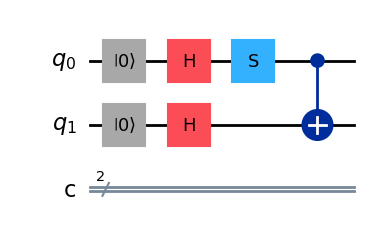

In [22]:
cnot_circuits['q0right_q1plus'].draw(output='mpl')

In [23]:
job_cnot = pec.run_measurements(cnot_circuits, ideal_measurement, backend, shots = 1000)
print(job_cnot)

In [24]:
g_cnot = pec.collect_results(job_cnot, qubit_numbers)
print(g_cnot)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 4.63175112e-02 -3.09912983e-02  1.00271195e+00  2.20400284e-02
   4.47873061e-03  4.30565933e-02  1.00128764e+00  9.02645459e-04
   7.46444770e-02  5.03716340e-02  9.92639845e-01  3.40392304e-02
   6.05106867e-03 -3.82902692e-03  1.00217104e+00 -1.14012168e-02]
 [-1.06081390e-02 -4.13979404e-02  3.23148846e-04  9.87140209e-01
  -8.25724003e-02  7.87563553e-02 -7.93974920e-02 -1.00005550e+00
  -6.34882075e-02 -4.22139626e-02  2.55807213e-02  3.93757782e-02
  -4.53506254e-02  3.56532122e-03  6.65564647e-03  1.32708262e-02]
 [ 1.00295774e+00 -9.96546406e-01 -4.33094720e-02  4.40049493e-02
  -9.94706275e-01  1.00825340e+00 -1.97584492e-02  6.96028158e-02
  -3.62648059e-02 -2.26000729e-02 -5.21515678e-02  2.60247196e-02
   2.90

In [25]:
# 將矩陣存成CSV檔案
filename = 'matrix_cnot_grammatrix.csv'
np.savetxt(filename, g_cnot, delimiter=",", fmt="%.10e")

In [26]:
#Calculate Readout Matrix by the quation Uerror = B^-1 * g_cnot * A^-1
ErrorCnot = pec.build_cnot_noisy_channel(A_matrix, B_matrix, g_cnot)
print("ErrorCnot:", ErrorCnot)
ErrorCnot_inv = inv(ErrorCnot)
print("ErrorCnot_inv:", ErrorCnot_inv)

ErrorCnot: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.53335853e-02  1.00193751e+00 -2.16142129e-03  1.15217628e-02
   5.87073774e-02 -6.67012360e-02 -2.22906157e-02 -1.33831691e-02
  -8.52742218e-03  1.10760530e-02 -1.80322140e-02  6.82388743e-03
  -5.74279685e-03  8.39068191e-03  1.60745129e-02  3.17920935e-02]
 [-1.87626748e-02 -2.60665406e-02  8.46731954e-03 -4.57630525e-02
  -4.76240920e-02  1.10547442e-01  7.34679874e-02  2.40292174e-02
  -2.93048908e-02  5.82241403e-02  3.24838370e-02  7.70387140e-03
  -1.25269340e-02  4.80728892e-02  1.02088719e+00  5.83202210e-02]
 [ 6.15795540e-03 -3.98303911e-02  6.21578002e-02 -2.60931872e-03
  -4.74321785e-02  1.28605771e-02  1.62885919e-03 -1.21134507e-02
   2.83046118e-02  4.18182235e-02 -4.40530391e-02 -1.91751798e

# Build PTM of the Ideal Ucnot

In [27]:
IdealCnot = pec.build_cnot_ptm()
print(IdealCnot)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.

In [28]:
#Construct Error channel
LambdaError = np.matmul(inv(IdealCnot), ErrorCnot)
# print(np.round(LambdaError2))
print(LambdaError.real)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.53335853e-02  1.00193751e+00 -2.16142129e-03  1.15217628e-02
   5.87073774e-02 -6.67012360e-02 -2.22906157e-02 -1.33831691e-02
  -8.52742218e-03  1.10760530e-02 -1.80322140e-02  6.82388743e-03
  -5.74279685e-03  8.39068191e-03  1.60745129e-02  3.17920935e-02]
 [ 2.55314605e-02 -3.65591805e-02  1.04024045e+00  2.73594897e-02
  -1.44599199e-02  3.98217038e-02  1.45631667e-02 -6.23068638e-02
   1.88280831e-02  4.29134639e-02  6.91588153e-03 -1.52897567e-02
   2.50412362e-02 -1.36015582e-02 -2.56755299e-02 -6.11129238e-03]
 [ 7.93391317e-03  8.55576985e-02  1.41126625e-02  1.07133507e+00
   1.97887083e-02 -1.18308797e-02 -1.08654486e-02  3.09383055e-03
  -1.25907150e-02 -1.46097687e-02  3.49478362e-02 -1.72414880e-02
  -2.50

# Pauli Twirling

In [29]:
# Transforming Pauli operators before a CNOT gate into equivalent operators after the gate.
pauli_transfer = pec.pauli_transfer_matrix()
print(pauli_transfer)

{'II': 'II', 'IX': 'IX', 'IY': 'ZY', 'IZ': 'ZZ', 'XI': 'XX', 'XX': 'XI', 'XY': 'YZ', 'XZ': 'YY', 'YI': 'YX', 'YX': 'YI', 'YY': 'XZ', 'YZ': 'XY', 'ZI': 'ZI', 'ZX': 'ZX', 'ZY': 'IY', 'ZZ': 'IZ'}


In [30]:
#Construct Pauli pairs 
PauliTwirling = {}
for q0_label, q0 in pec.generate_pauli_circuits(0).items():
    for q1_label, q1 in pec.generate_pauli_circuits(1).items():
        pauli_comb = q.circuit.QuantumCircuit.compose(q0, q1)
        PauliTwirling.update({f"{q0_label}{q1_label}": pauli_comb})
print(PauliTwirling)

{'II': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533a60>, 'IX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533d60>, 'IY': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533eb0>, 'IZ': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533d30>, 'XI': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f026ebf40>, 'XX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533ee0>, 'XY': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02533a00>, 'XZ': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f025335e0>, 'YI': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02532d70>, 'YX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02532b00>, 'YY': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f025328c0>, 'YZ': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02532770>, 'ZI': <qiskit.circuit.quantumcircuit.QuantumCircuit

In [31]:
# Combine Pauli ppair and Cnotgate Cirucit
Twirling_circuit_set = pec.generate_twirling_circuits(initial_circuits, PauliTwirling, pauli_transfer)
print(Twirling_circuit_set)

{'II': {'q0zero_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f026eb910>, 'q0zero_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f026eb790>, 'q0zero_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02531750>, 'q0zero_q1right': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f025314b0>, 'q0one_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02530fa0>, 'q0one_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02530d00>, 'q0one_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f026eb820>, 'q0one_q1right': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f026eb0a0>, 'q0plus_q1zero': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02530fd0>, 'q0plus_q1one': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02531ba0>, 'q0plus_q1plus': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f2f02531c60>, 'q0plus

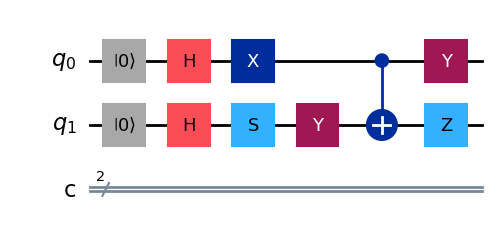

In [32]:
Twirling_circuit_set['XY']['q0plus_q1right'].draw(output='mpl') 

In [37]:
Twirling_job = pec.run_measurements(Twirling_circuit_set, ideal_measurement, backend, shots = 1000)
print(Twirling_job)

In [ ]:
inv_A = inv(A_matrix)
inv_B = inv(B_matrix)
inv_Ideal = inv(IdealCnot)
g_twirling = pec.collect_twirling_results(Twirling_job, qubit_numbers)
Avg_twirling = sum(inv_B @ g @ inv_A for g in g_twirling) / 16
Avg_gateError = inv_Ideal @ Avg_twirling 
Avg_gateError

array([[ 1.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [-7.61435781e-03+0.j,  1.01840002e+00+0.j,  1.47490692e-02+0.j,
         7.33964094e-03+0.j,  3.21360620e-02+0.j, -2.56463541e-02+0.j,
        -6.84770210e-03+0.j, -4.19245927e-02+0.j,  2.20450671e-02+0.j,
        -1.61708662e-02+0.j, -3.78157093e-02+0.j,  1.90068244e-02+0.j,
         5.18453998e-03+0.j,  1.80079700e-04+0.j, -6.04575857e-03+0.j,
         1.14147855e-02+0.j],
       [ 1.94114600e-02+0.j, -8.44443084e-03+0.j,  1.03803098e+00+0.j,
         8.23855217e-03+0.j,  1.03780350e-02+0.j, -2.04747875e-02+0.j,
         2.15340216e-03+0.j, -3.56117727e-02+0.j,  3.34350702e-02+0.j,
        -3.558104

In [48]:
result = np.diag(Avg_gateError).reshape(1, 16).astype(complex)
P = np.array([[1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],\
              [1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1],\
              [1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],\
              [1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1],\
              [1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],\
              [1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1],\
              [1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1],\
              [1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1],\
              [1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1],\
              [1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1],\
              [1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1],\
              [1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1],\
              [1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],\
              [1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1],\
              [1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1],\
              [1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1]])
weight_c = np.matmul(result, inv(P))
inv_weight_c = 1/weight_c
print(result)
print(weight_c)
print(inv_weight_c)

[[1.        +0.j 1.01840002+0.j 1.03803098+0.j 1.05732485+0.j
  1.03685326+0.j 1.03806632+0.j 1.03385999+0.j 1.06586574+0.j
  1.07707918+0.j 1.03758531+0.j 1.04633044+0.j 1.06009736+0.j
  1.0396085 +0.j 1.0478035 +0.j 1.01125373+0.j 1.0147853 +0.j]]
[[ 1.03893403e+00+0.j -2.00951955e-03+0.j -3.55702098e-03+0.j
   5.01774365e-03+0.j -2.88388419e-03+0.j -1.07107266e-02+0.j
  -5.30706566e-03+0.j -1.05692612e-03+0.j  2.92198731e-03+0.j
  -6.58037158e-03+0.j  2.06115199e-03+0.j  1.75158708e-03+0.j
  -1.05331704e-02+0.j  6.16625318e-05+0.j -2.62053731e-03+0.j
  -5.48894089e-03+0.j]]
[[ 9.62525021e-01+0.j -4.97631386e+02-0.j -2.81134131e+02-0.j
   1.99292764e+02+0.j -3.46754562e+02-0.j -9.33643473e+01-0.j
  -1.88428044e+02-0.j -9.46139926e+02-0.j  3.42232835e+02+0.j
  -1.51967102e+02-0.j  4.85165580e+02+0.j  5.70910811e+02+0.j
  -9.49381776e+01-0.j  1.62173036e+04+0.j -3.81601130e+02-0.j
  -1.82184509e+02-0.j]]
